# Cumulative Strategy

In [1]:
%load_ext autoreload
%autoreload 2

# Global imports and settings

In [2]:
import pickle
from torchvision.transforms import ToTensor, Compose, Normalize
import pandas as pd
import seaborn as sns
from tqdm import tqdm

In [8]:
from avalanche.benchmarks.classic import PermutedMNIST
from avalanche.models import SimpleMLP
from avalanche.training.plugins import EvaluationPlugin
from avalanche.training import Cumulative
from avalanche.logging import InteractiveLogger
from avalanche.evaluation.metrics import (
    accuracy_metrics,
)

from torch.nn import CrossEntropyLoss
from torch.optim import SGD

## Custom libraries

In [4]:
import sys

sys.path.append("..")

from base_code.constants import DATASETS_PATH, SAVED_METRICS_PATH

# Dataset and definitions

## Preprocessing definitions

In [5]:
train_transform = Compose([
    ToTensor(),
    Normalize((0.1307,), (0.3081,))
])
test_transform = Compose([
    ToTensor(),
    Normalize((0.1307,), (0.3081,))
])

## Dataset loading

In [5]:
scenario = PermutedMNIST(
    10,
    dataset_root=DATASETS_PATH,
    seed=1234,
)

## Scenario creation with train test streams

In [6]:
train_stream = scenario.train_stream
test_stream = scenario.test_stream

## Evaluation metrics definition

In [7]:
eval_plugin = EvaluationPlugin(
    accuracy_metrics(experience=True, stream=True),
    loggers=[InteractiveLogger()]
)

## Model, Optimizer, Loss and Strategy definitions

In [9]:
model = SimpleMLP(num_classes=scenario.n_classes, input_size=28 * 28, hidden_size=100, hidden_layers=2)
optimizer = SGD(model.parameters(), lr=0.001)
criterion = CrossEntropyLoss()
strategy = Cumulative(
    model, optimizer, criterion, train_mb_size=256, train_epochs=5, evaluator=eval_plugin, eval_mb_size=128
)

# Training and evaluation

In [10]:
results = []

for experience in tqdm(train_stream):
    strategy.train(experience)
    metrics = strategy.eval(test_stream)
    results.append(metrics)

  0%|          | 0/10 [00:00<?, ?it/s]

-- >> Start of training phase << --
100%|██████████| 235/235 [00:03<00:00, 70.73it/s]
Epoch 0 ended.
100%|██████████| 235/235 [00:03<00:00, 71.78it/s]
Epoch 1 ended.
100%|██████████| 235/235 [00:03<00:00, 70.79it/s]
Epoch 2 ended.
100%|██████████| 235/235 [00:03<00:00, 72.02it/s]
Epoch 3 ended.
100%|██████████| 235/235 [00:03<00:00, 70.55it/s]
Epoch 4 ended.
-- >> End of training phase << --
-- >> Start of eval phase << --
-- Starting eval on experience 0 (Task 0) from test stream --
100%|██████████| 79/79 [00:00<00:00, 145.63it/s]
> Eval on experience 0 (Task 0) from test stream ended.
	Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp000 = 0.5124
-- Starting eval on experience 1 (Task 0) from test stream --
100%|██████████| 79/79 [00:00<00:00, 140.22it/s]
> Eval on experience 1 (Task 0) from test stream ended.
	Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp001 = 0.1152
-- Starting eval on experience 2 (Task 0) from test stream --
100%|██████████| 79/79 [00:00<00:00, 144.12it/s]
> Eval

 10%|█         | 1/10 [00:22<03:18, 22.05s/it]


> Eval on experience 9 (Task 0) from test stream ended.
	Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp009 = 0.1887
-- >> End of eval phase << --
	Top1_Acc_Stream/eval_phase/test_stream/Task000 = 0.1554
-- >> Start of training phase << --
100%|██████████| 469/469 [00:06<00:00, 72.34it/s]
Epoch 0 ended.
100%|██████████| 469/469 [00:06<00:00, 72.50it/s]
Epoch 1 ended.
100%|██████████| 469/469 [00:06<00:00, 72.66it/s]
Epoch 2 ended.
100%|██████████| 469/469 [00:06<00:00, 71.41it/s]
Epoch 3 ended.
100%|██████████| 469/469 [00:06<00:00, 72.41it/s]
Epoch 4 ended.
-- >> End of training phase << --
-- >> Start of eval phase << --
-- Starting eval on experience 0 (Task 0) from test stream --
100%|██████████| 79/79 [00:00<00:00, 146.94it/s]
> Eval on experience 0 (Task 0) from test stream ended.
	Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp000 = 0.7381
-- Starting eval on experience 1 (Task 0) from test stream --
100%|██████████| 79/79 [00:00<00:00, 146.52it/s]
> Eval on experience 1 (Task 

 20%|██        | 2/10 [01:00<04:11, 31.42s/it]


> Eval on experience 9 (Task 0) from test stream ended.
	Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp009 = 0.2510
-- >> End of eval phase << --
	Top1_Acc_Stream/eval_phase/test_stream/Task000 = 0.2863
-- >> Start of training phase << --
100%|██████████| 704/704 [00:09<00:00, 71.02it/s]
Epoch 0 ended.
100%|██████████| 704/704 [00:09<00:00, 71.32it/s]
Epoch 1 ended.
100%|██████████| 704/704 [00:09<00:00, 70.44it/s]
Epoch 2 ended.
100%|██████████| 704/704 [00:09<00:00, 71.73it/s]
Epoch 3 ended.
100%|██████████| 704/704 [00:09<00:00, 71.66it/s]
Epoch 4 ended.
-- >> End of training phase << --
-- >> Start of eval phase << --
-- Starting eval on experience 0 (Task 0) from test stream --
100%|██████████| 79/79 [00:00<00:00, 136.87it/s]
> Eval on experience 0 (Task 0) from test stream ended.
	Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp000 = 0.7900
-- Starting eval on experience 1 (Task 0) from test stream --
100%|██████████| 79/79 [00:00<00:00, 146.33it/s]
> Eval on experience 1 (Task 

 30%|███       | 3/10 [01:55<04:55, 42.20s/it]


> Eval on experience 9 (Task 0) from test stream ended.
	Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp009 = 0.2011
-- >> End of eval phase << --
	Top1_Acc_Stream/eval_phase/test_stream/Task000 = 0.3423
-- >> Start of training phase << --
100%|██████████| 938/938 [00:13<00:00, 70.76it/s]
Epoch 0 ended.
100%|██████████| 938/938 [00:13<00:00, 71.03it/s]
Epoch 1 ended.
100%|██████████| 938/938 [00:13<00:00, 71.66it/s]
Epoch 2 ended.
100%|██████████| 938/938 [00:13<00:00, 71.24it/s]
Epoch 3 ended.
100%|██████████| 938/938 [00:13<00:00, 71.08it/s]
Epoch 4 ended.
-- >> End of training phase << --
-- >> Start of eval phase << --
-- Starting eval on experience 0 (Task 0) from test stream --
100%|██████████| 79/79 [00:00<00:00, 146.14it/s]
> Eval on experience 0 (Task 0) from test stream ended.
	Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp000 = 0.8241
-- Starting eval on experience 1 (Task 0) from test stream --
100%|██████████| 79/79 [00:00<00:00, 139.47it/s]
> Eval on experience 1 (Task 

 40%|████      | 4/10 [03:06<05:22, 53.79s/it]


> Eval on experience 9 (Task 0) from test stream ended.
	Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp009 = 0.1465
-- >> End of eval phase << --
	Top1_Acc_Stream/eval_phase/test_stream/Task000 = 0.4056
-- >> Start of training phase << --
100%|██████████| 1172/1172 [00:16<00:00, 71.77it/s]
Epoch 0 ended.
100%|██████████| 1172/1172 [00:16<00:00, 71.54it/s]
Epoch 1 ended.
100%|██████████| 1172/1172 [00:16<00:00, 71.14it/s]
Epoch 2 ended.
100%|██████████| 1172/1172 [00:16<00:00, 71.26it/s]
Epoch 3 ended.
100%|██████████| 1172/1172 [00:16<00:00, 71.18it/s]
Epoch 4 ended.
-- >> End of training phase << --
-- >> Start of eval phase << --
-- Starting eval on experience 0 (Task 0) from test stream --
100%|██████████| 79/79 [00:00<00:00, 146.06it/s]
> Eval on experience 0 (Task 0) from test stream ended.
	Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp000 = 0.8480
-- Starting eval on experience 1 (Task 0) from test stream --
100%|██████████| 79/79 [00:00<00:00, 140.30it/s]
> Eval on experienc

 50%|█████     | 5/10 [04:34<05:30, 66.02s/it]


> Eval on experience 9 (Task 0) from test stream ended.
	Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp009 = 0.1447
-- >> End of eval phase << --
	Top1_Acc_Stream/eval_phase/test_stream/Task000 = 0.4819
-- >> Start of training phase << --
100%|██████████| 1407/1407 [00:19<00:00, 71.59it/s]
Epoch 0 ended.
100%|██████████| 1407/1407 [00:19<00:00, 71.74it/s]
Epoch 1 ended.
100%|██████████| 1407/1407 [00:19<00:00, 71.51it/s]
Epoch 2 ended.
100%|██████████| 1407/1407 [00:19<00:00, 71.26it/s]
Epoch 3 ended.
100%|██████████| 1407/1407 [00:19<00:00, 71.29it/s]
Epoch 4 ended.
-- >> End of training phase << --
-- >> Start of eval phase << --
-- Starting eval on experience 0 (Task 0) from test stream --
100%|██████████| 79/79 [00:00<00:00, 145.44it/s]
> Eval on experience 0 (Task 0) from test stream ended.
	Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp000 = 0.8614
-- Starting eval on experience 1 (Task 0) from test stream --
100%|██████████| 79/79 [00:00<00:00, 138.88it/s]
> Eval on experienc

 60%|██████    | 6/10 [06:18<05:15, 78.97s/it]


> Eval on experience 9 (Task 0) from test stream ended.
	Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp009 = 0.1231
-- >> End of eval phase << --
	Top1_Acc_Stream/eval_phase/test_stream/Task000 = 0.5625
-- >> Start of training phase << --
100%|██████████| 1641/1641 [00:23<00:00, 71.02it/s]
Epoch 0 ended.
100%|██████████| 1641/1641 [00:23<00:00, 70.79it/s]
Epoch 1 ended.
100%|██████████| 1641/1641 [00:23<00:00, 71.04it/s]
Epoch 2 ended.
100%|██████████| 1641/1641 [00:23<00:00, 70.97it/s]
Epoch 3 ended.
100%|██████████| 1641/1641 [00:23<00:00, 70.92it/s]
Epoch 4 ended.
-- >> End of training phase << --
-- >> Start of eval phase << --
-- Starting eval on experience 0 (Task 0) from test stream --
100%|██████████| 79/79 [00:00<00:00, 140.30it/s]
> Eval on experience 0 (Task 0) from test stream ended.
	Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp000 = 0.8701
-- Starting eval on experience 1 (Task 0) from test stream --
100%|██████████| 79/79 [00:00<00:00, 145.07it/s]
> Eval on experienc

 70%|███████   | 7/10 [08:19<04:38, 92.84s/it]


> Eval on experience 9 (Task 0) from test stream ended.
	Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp009 = 0.1052
-- >> End of eval phase << --
	Top1_Acc_Stream/eval_phase/test_stream/Task000 = 0.6382
-- >> Start of training phase << --
100%|██████████| 1875/1875 [00:25<00:00, 72.24it/s]
Epoch 0 ended.
100%|██████████| 1875/1875 [00:25<00:00, 72.22it/s]
Epoch 1 ended.
100%|██████████| 1875/1875 [00:26<00:00, 70.75it/s]
Epoch 2 ended.
100%|██████████| 1875/1875 [00:26<00:00, 71.19it/s]
Epoch 3 ended.
100%|██████████| 1875/1875 [00:26<00:00, 71.15it/s]
Epoch 4 ended.
-- >> End of training phase << --
-- >> Start of eval phase << --
-- Starting eval on experience 0 (Task 0) from test stream --
100%|██████████| 79/79 [00:00<00:00, 145.99it/s]
> Eval on experience 0 (Task 0) from test stream ended.
	Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp000 = 0.8767
-- Starting eval on experience 1 (Task 0) from test stream --
100%|██████████| 79/79 [00:00<00:00, 145.30it/s]
> Eval on experienc

 80%|████████  | 8/10 [10:36<03:33, 106.84s/it]


> Eval on experience 9 (Task 0) from test stream ended.
	Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp009 = 0.1020
-- >> End of eval phase << --
	Top1_Acc_Stream/eval_phase/test_stream/Task000 = 0.7138
-- >> Start of training phase << --
100%|██████████| 2110/2110 [00:29<00:00, 71.07it/s]
Epoch 0 ended.
100%|██████████| 2110/2110 [00:29<00:00, 71.20it/s]
Epoch 1 ended.
100%|██████████| 2110/2110 [00:29<00:00, 70.91it/s]
Epoch 2 ended.
100%|██████████| 2110/2110 [00:29<00:00, 70.91it/s]
Epoch 3 ended.
100%|██████████| 2110/2110 [00:29<00:00, 71.02it/s]
Epoch 4 ended.
-- >> End of training phase << --
-- >> Start of eval phase << --
-- Starting eval on experience 0 (Task 0) from test stream --
100%|██████████| 79/79 [00:00<00:00, 138.65it/s]
> Eval on experience 0 (Task 0) from test stream ended.
	Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp000 = 0.8856
-- Starting eval on experience 1 (Task 0) from test stream --
100%|██████████| 79/79 [00:00<00:00, 145.70it/s]
> Eval on experienc

 90%|█████████ | 9/10 [13:10<02:01, 121.68s/it]


> Eval on experience 9 (Task 0) from test stream ended.
	Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp009 = 0.1118
-- >> End of eval phase << --
	Top1_Acc_Stream/eval_phase/test_stream/Task000 = 0.7971
-- >> Start of training phase << --
100%|██████████| 2344/2344 [00:33<00:00, 70.84it/s]
Epoch 0 ended.
100%|██████████| 2344/2344 [00:33<00:00, 70.81it/s]
Epoch 1 ended.
100%|██████████| 2344/2344 [00:33<00:00, 70.96it/s]
Epoch 2 ended.
100%|██████████| 2344/2344 [00:33<00:00, 70.76it/s]
Epoch 3 ended.
100%|██████████| 2344/2344 [00:33<00:00, 70.82it/s]
Epoch 4 ended.
-- >> End of training phase << --
-- >> Start of eval phase << --
-- Starting eval on experience 0 (Task 0) from test stream --
100%|██████████| 79/79 [00:00<00:00, 144.25it/s]
> Eval on experience 0 (Task 0) from test stream ended.
	Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp000 = 0.8879
-- Starting eval on experience 1 (Task 0) from test stream --
100%|██████████| 79/79 [00:00<00:00, 138.95it/s]
> Eval on experienc

100%|██████████| 10/10 [16:02<00:00, 96.22s/it] 


> Eval on experience 9 (Task 0) from test stream ended.
	Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp009 = 0.8220
-- >> End of eval phase << --
	Top1_Acc_Stream/eval_phase/test_stream/Task000 = 0.8768


# Plotting results

In [14]:
accuracies: dict[int, list[float]] = dict()

for i in range(10):
    accuracies[f"Task{i}"] = eval_plugin.get_all_metrics()[f"Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp00{i}"][1]

accuracies["Overall"] = eval_plugin.get_all_metrics()["Top1_Acc_Stream/eval_phase/test_stream/Task000"][1]

In [15]:
acc_df = pd.DataFrame(accuracies)
acc_df.index = range(10)

<Axes: >

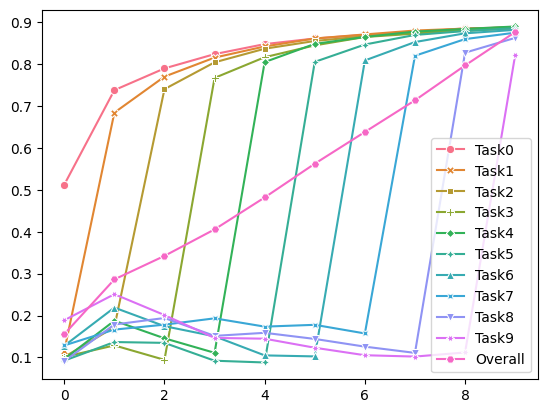

In [16]:
sns.lineplot(data=acc_df, dashes=False, markers=True)

# Store metrics

In [1]:
pickle.dump(accuracies, open(SAVED_METRICS_PATH / "cumulative.pkl", "wb"))

NameError: name 'pickle' is not defined